# Problem 3

For this problem, our goal is to build several classification models in order to help classify galaxies for the Galaxy Zoo project. 

To begin, we import packages that we will find useful later on, such as Random (to set a seed for easy replication), pandas (for ease of data manipuation), matplotlib (for plotting), and sklearn (for our classification models).

In [42]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import xlabel, xticks, ylabel
from sklearn.ensemble import RandomForestClassifier


We are given a CSV with all of the data, and we need to take a minute to look at all the information given. We are given information on the color,eccentricity, the 4th order adaptive moment in each filter (which measures the kurtosis or “tailed-ness” of a distribution), and the Petrosian magnitudes.

In [43]:
data=pd.read_csv('C:\\Users\\lazyp\\Desktop\\Willamette Univeristy\\SPRING 2024\\data275\\homework-4-kendall-and-sam-main\\data\\galaxies.csv')

Next, we need to split our data for testing and training. We split our data where 80% of the data is assigned to training data and the remaining 20% is assigned to testing data. 

In [44]:
random.seed(420)
train_df,test_df=train_test_split(data,test_size=0.2)

## Part A

We start our decent into classifcation models with a logistic regression model. 

In [45]:
model = LogisticRegression(max_iter=10000)

Next, we need to fit the model, using the training data.

In [46]:
model_fit = model.fit(train_df[['u-g','g-r','r-i','i-z','ecc','m4_u','m4_g','m4_r','m4_i','m4_z','petroR50_u','petroR50_r','petroR50_z','petroR90_u','petroR90_r','petroR90_z']],train_df['class'])

We then need to see how it predicts, by feeding it the testing data. 

In [47]:
test_df['Logistic_predicted']=model.predict(test_df[['u-g','g-r','r-i','i-z','ecc','m4_u','m4_g','m4_r','m4_i','m4_z','petroR50_u','petroR50_r','petroR50_z','petroR90_u','petroR90_r','petroR90_z']])

We then evaluate our model by making a confustion matrix of its predictions of the test data. We can see from the confusion matrix that the model has the hardest time predicting merger galaxies and often correctly predicts the elliptical galaxies.

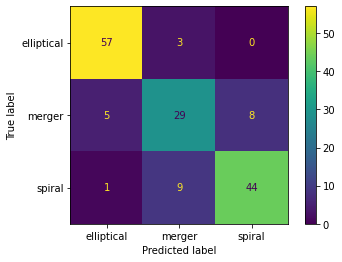

In [48]:
Confusion_Matrix=CMD.from_predictions(test_df['class'],test_df['Logistic_predicted'])

While a confusion matrix is useful, there are more accurate ways of measuring how well a model does in classification. The first is precision; precision measures the accuracy of the positive predictions made by the model. It answers the question: "Of all the instances predicted as positive, how many are actually positive?". In order to make things we efficent, we created a function which takes in the predictions and actual data to calculate the precision for this model.

In [49]:
def find_precision(predicted_list,actual_list):
    unique_list=set(actual_list)
    print(unique_list)
    precision_stat_list=[]
    for type in unique_list:
        TP=0
        FP=0
        for x,observation in enumerate(predicted_list):
            if observation==type:
                if actual_list[x]==type:
                    TP+=1
                else:
                    FP+=1
        precision_stat_list.append(TP/(TP+FP))
    return precision_stat_list
    

The second method is recall, which measures the ability of the model to correctly identify all positive instances. It answers the question: "Of all the actual positive instances, how many did the model correctly identify?" Once again, for ease of use, a function has been created.

In [50]:
def find_recall(predicted_list,actual_list):
    unique_list=set(actual_list)
    print(unique_list)
    recall_stat_list=[]
    for type in unique_list:
        TP=0
        FN=0
        for x,observation in enumerate(actual_list):
            if observation==type:
                if predicted_list[x]==type:
                    TP+=1
                else:
                    FN+=1
        recall_stat_list.append(TP/(TP+FN))
    return recall_stat_list

We then implement these functions, and print out our recall and precision values for each type of galaxy using our logistic regression model. This was done to see if there was some type of galaxy that the model was great at predicting, with the hope that the information could be used to improve future models. Sadly there was nothing crazy to be found in other then elliptical galaxies consistently having a high recall. 

In [51]:
random.seed(420)
log_precision_list=find_precision(list(test_df['Logistic_predicted']),list(test_df['class']))
log_recall_list=find_recall(list(test_df['Logistic_predicted']),list(test_df['class']))
label=['Type','Recall','Precision']
type=list(set(test_df['class']))
data={'Type':type,'Recall':log_recall_list,'Precision':log_precision_list}
print(pd.DataFrame(data))


{'elliptical', 'merger', 'spiral'}
{'elliptical', 'merger', 'spiral'}
         Type    Recall  Precision
0  elliptical  0.950000   0.904762
1      merger  0.690476   0.707317
2      spiral  0.814815   0.846154


It was found that the  overall accuracy of the model to be around 87%. 

In [52]:
random.seed(420)
accuracy=len(test_df[test_df['class']==test_df['Logistic_predicted']])/len(test_df)
print(accuracy)

0.8333333333333334


## Part B

Utilizing the same data, we move onto our next method of classification: Decision Tree model.

In [53]:
random.seed(420)
tree = DecisionTreeClassifier(ccp_alpha=0.01)
#ccp_alpha determines the complexity of the tree, if it is too low the tree will over fit, but too high and it won't predict well enough

 We are  training it with the same data and asking it to predict the same test data as before, ensured by the seed we set at the very beginning of tackling this problem. 

In [54]:
model = tree.fit(train_df[['u-g','g-r','r-i','i-z','ecc','m4_u','m4_g','m4_r','m4_i','m4_z','petroR50_u','petroR50_r','petroR50_z','petroR90_u','petroR90_r','petroR90_z']],train_df['class'])
test_df['Tree_predicted']=model.predict(test_df[['u-g','g-r','r-i','i-z','ecc','m4_u','m4_g','m4_r','m4_i','m4_z','petroR50_u','petroR50_r','petroR50_z','petroR90_u','petroR90_r','petroR90_z']])


We then make a confusion matrix to see how well it performs. We see that this model is worse at predicting the galaxy types then the logistic regression model overall. 

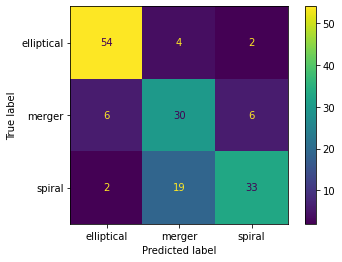

In [55]:
cm=confusion_matrix(test_df['class'],test_df['Tree_predicted'])
CMD(confusion_matrix=cm,display_labels=type).plot()

When dealing with decision trees, a huge factor is determining what elements the model beleives are most significant when classifiying a galaxy. We are able to visualize this by creating a graph, notice that it only takes into account seven aspects of the data with it caring about u-g and petroR90_r the most.

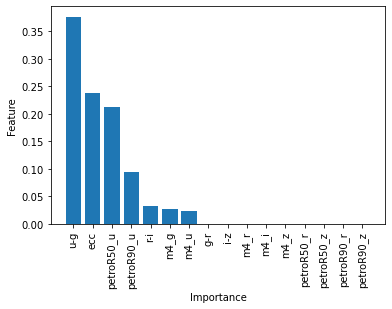

In [56]:
importance=pd.Series(tree.feature_importances_,train_df.iloc[:,:16].columns)
importance.sort_values(ascending=False,inplace=True)
plt.bar(importance.index,importance)
xlabel('Importance')
ylabel('Feature')
xticks(rotation=90)
plt.show()

The best way to understand how these trees work is to visualize the models branches, which we do to gain a better understanding.

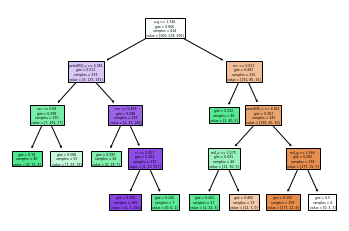

In [57]:
random.seed(420)
from sklearn.tree import plot_tree
plot_tree(tree, filled=True, feature_names=train_df.iloc[:,:16].columns)
plt.show()

Next we look at the recall and precision of the Decision Tree model for specific galaxy types. It seems to be significantly worse at predicting the merger galaxies then the logistic regression model. 

In [58]:
random.seed(420)
tree_precision_list=find_precision(list(test_df['Tree_predicted']),list(test_df['class']))
tree_recall_list=find_recall(list(test_df['Tree_predicted']),list(test_df['class']))
label=['Type','Recall','Precision']
type=list(set(test_df['class']))
data={'Type':type,'Recall':tree_recall_list,'Precision':tree_precision_list}
print(pd.DataFrame(data))


{'elliptical', 'merger', 'spiral'}
{'elliptical', 'merger', 'spiral'}
         Type    Recall  Precision
0  elliptical  0.900000   0.870968
1      merger  0.714286   0.566038
2      spiral  0.611111   0.804878


We find its overall accuracy to be around 86.5%. 

In [59]:
random.seed(420)
accuracy=len(test_df[test_df['class']==test_df['Tree_predicted']])/len(test_df)
print(accuracy)

0.75


## Part C

To move onto our next classification mode: Random Forest.

In [60]:
random.seed(420)
forest = RandomForestClassifier(n_estimators=1000)

 Now we are training this model with the same data and asking it to predict with the same test data. 

In [61]:
random.seed(420)
forest_fit = forest.fit(train_df[['u-g','g-r','r-i','i-z','ecc','m4_u','m4_g','m4_r','m4_i','m4_z','petroR50_u','petroR50_r','petroR50_z','petroR90_u','petroR90_r','petroR90_z']],train_df['class'])
test_df['Forest_predicted']=forest.predict(test_df[['u-g','g-r','r-i','i-z','ecc','m4_u','m4_g','m4_r','m4_i','m4_z','petroR50_u','petroR50_r','petroR50_z','petroR90_u','petroR90_r','petroR90_z']])

We do the same thing of making a confusion matrix to check the accuracy of the model. From this matrix, we can see a high number of correct predictions for merger galaxies.

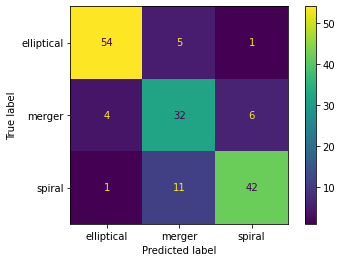

In [62]:
cm=confusion_matrix(test_df['class'],test_df['Forest_predicted'])
labels=list(set(test_df['class']))
CMD(confusion_matrix=cm,display_labels=labels).plot()

Again, for methods like trees and forests, it can be very helpful to see what variable this model considers the most influential. Notice that it seems to care about more of the features then the Decision Tree model.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

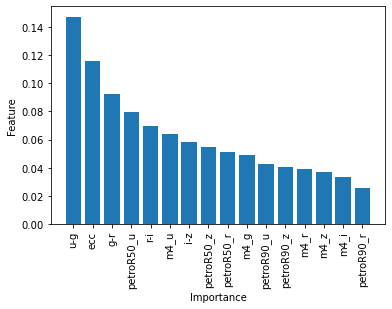

In [63]:
importance=pd.Series(forest.feature_importances_,train_df.iloc[:,:16].columns)
importance.sort_values(ascending=False,inplace=True)
plt.bar(importance.index,importance)
xlabel('Importance')
ylabel('Feature')
xticks(rotation=90)

Now we are doing the same process of finding the precesion and recall of the Random Forest model for specific galaxy types. We find that while it does struggle a bit with the precision of merger galaxies, its decent at predicting the other two.

In [64]:
random.seed(420)
forest_precision_list=find_precision(list(test_df['Forest_predicted']),list(test_df['class']))
forest_recall_list=find_recall(list(test_df['Forest_predicted']),list(test_df['class']))
label=['Type','Recall','Precision']
type=list(set(test_df['class']))
data={'Type':type,'Recall':forest_recall_list,'Precision':forest_precision_list}
print(pd.DataFrame(data))


{'elliptical', 'merger', 'spiral'}
{'elliptical', 'merger', 'spiral'}
         Type    Recall  Precision
0  elliptical  0.900000   0.915254
1      merger  0.761905   0.666667
2      spiral  0.777778   0.857143


 We found that the forest prediction is about 87% accurate.

In [65]:
random.seed(420)
accuracy=len(test_df[test_df['class']==test_df['Forest_predicted']])/len(test_df)
print(accuracy)

0.8205128205128205


## Part D

For ease of answering the proposed questions, we created a table with the precesion and recall of each model. 

In [66]:
data={'Type':type,'Log_Recall':log_recall_list,'Log_Precision':log_precision_list,'Tree Recall':tree_recall_list,'Tree Precision':tree_precision_list,'Forest Recall':forest_recall_list,'Forest Precision':forest_precision_list}
print(pd.DataFrame(data))

         Type  Log_Recall  Log_Precision  Tree Recall  Tree Precision  \
0  elliptical    0.950000       0.904762     0.900000        0.870968   
1      merger    0.690476       0.707317     0.714286        0.566038   
2      spiral    0.814815       0.846154     0.611111        0.804878   

   Forest Recall  Forest Precision  
0       0.900000          0.915254  
1       0.761905          0.666667  
2       0.777778          0.857143  


If I was doing a study on eliptical galaxies, I would use the Forest model because it has the precision and recall for this galaxy type. While the high recall is great, but what we really care about in this senario is the precision. This is due to the need for truely elliptical galaxies for the study.
         
If I was doing a study on spiral galaxies and wanted as many as possible, I would use the log model due to its high recall. You could make the argument that the forest model would be better due to its higher precision, but the recall is more important in this case.

If I am interested in exploring the intersection between spiral and elliptical galaxies, and  would love to build up a dataset of galaxies that could easily be mistaken as either a spiral or an elliptical galaxy I would use  the logistic regression as, in this case, both precision and recall are equally important, and the log model has have similar high precison and recall for both elliptical and spiral galaxies.